# Lecture 4 Regression Continued

- Other Cost Functions
- Using minimize instead of our gradient descent method to parameterize equation
- Using minimize to parameterize a second order, linear ODE model

# Regression : Things we should understand

- Cost function selection
    - Weighting (no universal method to this)
- Most regression algorithms only act on the error function!
    - The same regression tool can be used to parameterize algrebriac equations, quadratic equations, and ODEs!
- Regression is hard - and OFTEN fails
    - We'll try some slightly harder regressions today
- Not all parameters we are trying to fit are important
    - Sensivity analysis
- And lastly, regression ultimately involves understanding data and error
    - We need to be able to determine when data and the fits are signficant...STATISTICS!

# Other cost functions

- Some of squared error is not the end all solutions
- Other approaches:
    - Root mean squared error : RMSE  = $\sqrt{\frac{SSE}{N}}$ where N is the number of observations
    - Normalized RMSE = $\frac{RMSE}{y_{max}-y_{min}}$
- Look at homework 6...the squared part makes finding reasonable learning rates very hard! 
    - Try RMSE instead of SSE, how does it impact the learning rate?
- However, there is no consistent means of normalization and it will often be problem dependent
- BUT, the importance of normalization cannot be stressed enough. 
    - What happens if you're trying to fit two outcomes, $y_1$ and $y_2$ and the mean of $y_1$ is 0.1 and the mean of $y_2$ is 27 million? 

# Basic regression in Python: FSOLVE vs Minimize

- Hint: they are basically the same things
    - Fsolve default uses "Powell's Method"
    - Minimize default will use other approaches but can be set to use Powell's as well
    - What is Powells? It's gradient descent paired with another approach called Gauss-Newton
- The primary difference is that minimize has the ability to include bounds and constraints
    - Bounds are ranges in which the parameters can take 
    - Constraints; e.g. x1 + x2 != 20
    

# Simple regression example with minimize

*Courtesy of Dr. Kitchins*

Suppose we have the following data that shows how the energy of a material depends on the volume of the material.

Text(0, 0.5, 'E')

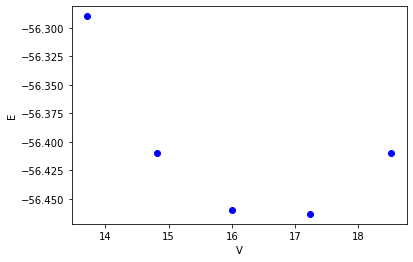

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

volumes = np.array([13.71, 14.82, 16.0, 17.23, 18.52])
energies = np.array([-56.29, -56.41, -56.46, -56.463,-56.41])

plt.plot(volumes, energies, 'bo')
plt.xlabel('V')
plt.ylabel('E')

In chemical engieering, we often want to fit an equation of state to this data. We will use this equation:

$E = E_0 + \frac{B_0 V}{B_0'}\left(\frac{(V_0 / V)^{B_0'}}{B_0' - 1} + 1 \right) - \frac{V_0 B_0}{B_0' - 1}$

from [https://journals.aps.org/prb/pdf/10.1103/PhysRevB.28.5480](https://journals.aps.org/prb/pdf/10.1103/PhysRevB.28.5480). In this model there are four parameters:

| name|desc|
|---|---|
| E\_0|energy at the minimim|
| B\_0|bulk modulus|
| B\_0'|first derivative of the bulk modulus|
| V\_0|volume at the energy minimum|

We would like to find the value of these parameters that best fits the data above. That means, find the set of parameters that minimize the sum of the squared errors between the model and data.

First we need a function that will use the parameters and return the energy for a given volume.



In [2]:
def Murnaghan(parameters, vol):
    'From PRB 28,5480 (1983)'
    E0, B0, BP, V0 = parameters
    # the backslash here means the line is contined on the next line.
    # or use () around the whole expression
    E = (E0 + B0 * vol / BP * 
        (((V0 / vol)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1.))

    return E

import numpy as np
Murnaghan((-56.45, 2, 1.2, 16.7), np.linspace(14, 18))

array([-55.95396512, -55.9854448 , -56.01576305, -56.04493457,
       -56.07297374, -56.09989473, -56.12571141, -56.15043744,
       -56.1740862 , -56.19667087, -56.21820436, -56.23869938,
       -56.25816839, -56.27662367, -56.29407727, -56.31054101,
       -56.32602655, -56.34054532, -56.35410858, -56.36672737,
       -56.37841258, -56.38917489, -56.39902482, -56.40797271,
       -56.41602873, -56.42320289, -56.42950503, -56.43494484,
       -56.43953184, -56.44327541, -56.44618477, -56.44826902,
       -56.44953708, -56.44999775, -56.4496597 , -56.44853145,
       -56.4466214 , -56.4439378 , -56.4404888 , -56.43628241,
       -56.43132653, -56.42562893, -56.41919727, -56.41203909,
       -56.40416182, -56.39557278, -56.38627918, -56.37628814,
       -56.36560665, -56.35424162])

Next, we need a function that computes the summed squared errors for a set of parameters. The use of squared errors is preferable in many cases to the absolute values because it has a continuous derivative. We will learn more about this later.



In [3]:
def objective(pars):
    err = energies - Murnaghan(pars, volumes)
    return np.sum(err**2)  # we return the summed squared error directly

# Random guessing isn't helpful

Finally,  we need an initial guess to start the minimization. 

*As with all minimization problems, this can be the most difficult step.* Random guessing can make parameterization very hard!!




<ipython-input-2-6fcf3a4ed4eb>:7: RuntimeWarning: divide by zero encountered in true_divide
  (((V0 / vol)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1.))
<ipython-input-2-6fcf3a4ed4eb>:7: RuntimeWarning: divide by zero encountered in double_scalars
  (((V0 / vol)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1.))
<ipython-input-2-6fcf3a4ed4eb>:6: RuntimeWarning: invalid value encountered in subtract
  E = (E0 + B0 * vol / BP *
<ipython-input-2-6fcf3a4ed4eb>:7: RuntimeWarning: divide by zero encountered in true_divide
  (((V0 / vol)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1.))
<ipython-input-2-6fcf3a4ed4eb>:7: RuntimeWarning: divide by zero encountered in double_scalars
  (((V0 / vol)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1.))
<ipython-input-2-6fcf3a4ed4eb>:6: RuntimeWarning: invalid value encountered in subtract
  E = (E0 + B0 * vol / BP *


      fun: nan
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([nan, nan, nan, nan])
  message: 'NaN result encountered.'
     nfev: 5
      nit: 0
     njev: 1
   status: 3
  success: False
        x: array([1., 1., 1., 1.])


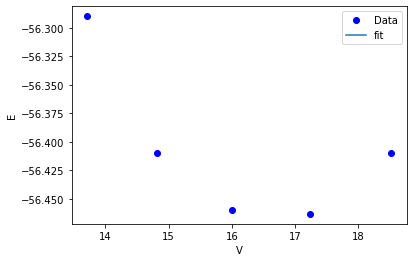

In [4]:
from scipy.optimize import minimize

x0 = [1,1,1,1]; # Being lazy with a random guess

sol = minimize(objective, x0);
print(sol);

plt.plot(volumes, energies, 'bo', label='Data');
vfit = np.linspace(min(volumes), max(volumes));
plt.plot(vfit, Murnaghan(sol.x, vfit), label='fit');
plt.legend();
plt.xlabel('V');
plt.ylabel('E');

# It's best to use your knowledge of the system to derive some estimates!

**Random guessing is always best to AVOID.**

Instead, use properties of the model and data where possible to make these guesses. We have no way to plot anything in four dimensions, so we use analysis instead.

We can derive some of these from the data we have. First, we can get the minimum in energy and the corresponding volume that we know from the data. These are not the final answer, but they are a good guess for it.

The B<sub>0</sub> parameter is related to the curvature at the minimum, which is the second derivative. We get that from repeated calls to `numpy.gradient`. Finally, $B_0'$ is related to the derivative of $B$ at the minimum, so we estimate that too.

In [5]:
imin = np.argmin(energies)
dedv = np.gradient(energies, volumes)
B = np.gradient(dedv, volumes)
Bp = np.gradient(B, volumes)


x0 = [energies[imin],
      B[imin],
      Bp[imin],
      volumes[imin]]

x0

[-56.463, 0.02575384116153356, -0.00900405886406903, 17.23]

# With some understanding, now ready for our fit!

      fun: 1.4912965292000374e-05
 hess_inv: array([[ 3.03655262e-01, -3.02117479e+00,  8.02411484e+01,
        -2.40892423e+00],
       [-3.02117479e+00,  5.26826564e+01, -1.63190814e+03,
         4.74560513e+01],
       [ 8.02411484e+01, -1.63190814e+03,  7.04847699e+04,
        -2.81155533e+03],
       [-2.40892423e+00,  4.74560513e+01, -2.81155533e+03,
         1.54396029e+02]])
      jac: array([ 3.45420619e-06,  1.37083941e-06,  4.54076599e-09, -5.27809448e-07])
  message: 'Optimization terminated successfully.'
     nfev: 180
      nit: 31
     njev: 36
   status: 0
  success: True
        x: array([-56.46839792,   0.57236182,   2.74085527,  16.55900229])


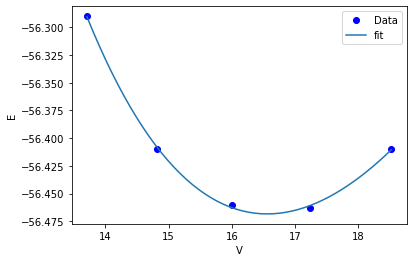

In [6]:
from scipy.optimize import minimize
sol = minimize(objective, x0);
print(sol);

plt.plot(volumes, energies, 'bo', label='Data');
vfit = np.linspace(min(volumes), max(volumes));
plt.plot(vfit, Murnaghan(sol.x, vfit), label='fit');
plt.legend();
plt.xlabel('V');
plt.ylabel('E');

# Training ODE models with minimize

- First, we are using minimize as an example. There are 1000's of algorithms, all with weakness and benefits.
- In ChE, most of our models are differential equations that have been developed using conservations principles.
- Very frequently, most if not all of the parameters of the model are unknown and must be estimated.

\begin{align}
\frac{dx}{dt} = y\\
\frac{dy}{dt} = -x - .2y\\
\end{align}

Let's use this system to generate artificial data, and then go backwards and use regression to estimate our parameters. 

# Step 1: create fake data

Below :

- Write the code to simulate the system from time = 0 to 30 with step sizes equal to 0.5.
- Code will have to be able to take in parameter values into the ODEs, so that different values can be tested.
- Collect the data into a variable call training_data.
- For completeness, plot the training data.

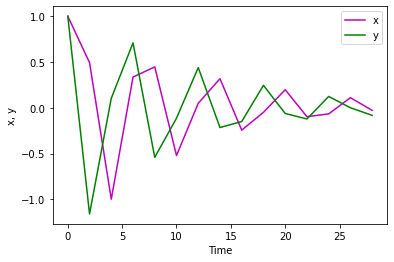

In [7]:
from scipy.integrate import odeint 
def odes_2(v,t,a,b,c): 
    #odeint always has to have some t to run correctly

    x = v[0]
    y = v[1]
    
    f = [a*y, b*x + c*y]
    return f 

t_steps = np.arange(0,30,2)

ic_3 = [1,1]
training_data = odeint(odes_2, ic_3, t_steps,args= (1,-1,-.2))

plt.plot(t_steps, training_data[:,0], color = 'm')
plt.plot(t_steps, training_data[:,1], color = 'g')
plt.xlabel("Time")
plt.ylabel("x, y")
plt.legend(['x', 'y'])

# Below, write the function to define the RMSE.

**Be sure to test some values**


In [8]:
def RMSE(params):
    a, b, c = params;
    ODE_output = odeint(odes_2, ic_3, t_steps, args = (a,b,c));
    err = training_data - ODE_output
    return np.sqrt(np.sum(err**2))  # we return the summed squared error directly

RMSE([1,-1.0,-.2])

0.0

# Now use minimize to estimate parameters.

- Since we have no other information, use (a,b,c) = (1,1,1) as a first guess.
- Once successful, plot the results.
- Then, re run your routine but instead of taking steps size of .5, take step sizes of 10. What happens?

In [9]:
sol = minimize(RMSE, x0 = (1,-1,-1));
print(sol);

# plt.plot(volumes, energies, 'bo', label='Data');
# vfit = np.linspace(min(volumes), max(volumes));
# plt.plot(vfit, Murnaghan(sol.x, vfit), label='fit');
# plt.legend();
# plt.xlabel('V');
# plt.ylabel('E');

      fun: 6.687430234749575e-07
 hess_inv: array([[ 8.53299426e-07,  7.75344951e-07, -4.77847206e-08],
       [ 7.75344951e-07,  7.18947010e-07, -4.14589697e-08],
       [-4.77847206e-08, -4.14589697e-08,  1.73737811e-08]])
      jac: array([-0.87307772,  1.07016316,  0.35410917])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 399
      nit: 34
     njev: 97
   status: 2
  success: False
        x: array([ 0.99999948, -1.00000047, -0.2       ])


# What we can learn:
- Minimize can fit the parameters of our ODE but will have to try several first guesses.
    - Hopefully should always at least know the sign of the parameter
- For a **linear ODE mode**, as we sample fewer and fewer time points, we can still basically fit the ODEs
    - This is because the steady state of a linear ODE is unique! Only 1 set of parameters will lead to a SS value we see here and therefore, we do not need a lot of dynamics measurements.
    - Fitting linear ODEs is typically easy.
    - As you can imagine, **this is not typically true for nonlinear ODEs!!**